In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandas.plotting import autocorrelation_plot
from math import sqrt
import scipy as sp
from scipy import stats
import scipy.signal
from scipy.signal import fftconvolve, convolve
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import random as ran

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import datasets
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
#from textacy.preprocess import preprocess_text

from gensim import corpora, models, matutils
from collections import defaultdict, Counter

import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tensorflow as tf

import patsy
from itertools import combinations

import graphviz
import json
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import re
import twitter

In [2]:
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Build and document a working model, prototype, recommendation, or solution

Note: The new Statcast metrics are available beginning from the 2015 baseball season to the current season. I downloaded the 2015-2017 baseball season data for all teams which will be used in the data modeling.

## [pybaseball](https://github.com/jldbc/pybaseball) 
Pull current and historical baseball statistics using Python (Statcast, Baseball Reference, FanGraphs)

`pybaseball` is a Python package for baseball data analysis. This package scrapes Baseball Reference, Baseball Savant, and FanGraphs so you don't have to. The package retrieves statcast data, pitching stats, batting stats, division standings/team records, awards data, and more. Data is available at the individual pitch level, as well as aggregated at the season level and over custom time periods. See the [docs](https://github.com/jldbc/pybaseball/tree/master/docs) for a comprehensive list of data acquisition functions.

**Statcast**

The statcast function retrieves pitch-level statcast data for a given date or range or dates.

statcast(start_dt=[yesterday's date], end_dt=None, team=None)

In [3]:
# Pull advanced metrics from Major League Baseball's Statcast system
#from pybaseball import statcast

# Look up a player's MLBAM, Retrosheet, FanGraphs, and Baseball Reference ID by name
#from pybaseball import playerid_lookup

### Reading a File

In [4]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/Documents/Employment/TRAINING/DATA SCIENCE/PROJECTS/PredictingBaseballStatistics/Datasets'

In [5]:
# Read file into DataFrame
# Note: header=0 disables the header from the file
all_MLB_teams2015_2017 = pd.read_csv(data_path + 'all_MLB_teams2015_2017.csv', header=0) # Comma-separated values file

### Examine the DataFrame

In [6]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(all_MLB_teams2015_2017.shape[0], all_MLB_teams2015_2017.shape[1]))

Rows: 2139920, Cols: 91


In [7]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
all_MLB_teams2015_2017.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139920 entries, 0 to 2139919
Data columns (total 91 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Unnamed: 0                       2139920 non-null  int64  
 1   index                            2139920 non-null  int64  
 2   pitch_type                       2136106 non-null  object 
 3   game_date                        2139920 non-null  object 
 4   release_speed                    2137415 non-null  float64
 5   release_pos_x                    2118565 non-null  float64
 6   release_pos_z                    2118565 non-null  float64
 7   player_name                      2139920 non-null  object 
 8   batter                           2139920 non-null  float64
 9   pitcher                          2139920 non-null  float64
 10  events                           553868 non-null   object 
 11  description                      2139920 non-null 

In [8]:
# Column names (which is "an index")
all_MLB_teams2015_2017.columns

Index(['Unnamed: 0', 'index', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person

In [9]:
# Sort a DataFrame by multiple columns
# Note: ascending: sort ascending vs. descending; ascending=True is default
#       inplace=True changes the original DataFrame
all_MLB_teams2015_2017.sort_values(by=['game_date', 'game_pk', 'at_bat_number', 'pitch_number'], ascending=True, inplace=True)

In [10]:
# Print the first 5 rows and the last 5 rows of the DataFrame
all_MLB_teams2015_2017.head().append(all_MLB_teams2015_2017.tail())

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
2139919,702491,17584,FF,2015-04-05,93.6,2.5520,5.5293,Jon Lester,572761.0,452657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2139918,702490,17583,FF,2015-04-05,93.4,2.5694,5.6476,Jon Lester,572761.0,452657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2139917,702489,17582,FF,2015-04-05,94.8,2.6266,5.2936,Jon Lester,572761.0,452657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2139916,702488,17581,FF,2015-04-05,91.6,NaN,NaN,Jon Lester,572761.0,452657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2139915,702487,17580,CU,2015-04-05,75.9,NaN,NaN,Jon Lester,572761.0,452657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,4,650,FT,2017-10-01,95.9,-0.8903,6.1341,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
3,3,636,CH,2017-10-01,82.8,-0.9901,6.0626,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
2,2,620,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
1,1,615,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
0,0,597,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN


#### Identifying important columns to include in the DataFrame.

In [11]:
# Select multiple columns
# Note: release_speed = Pitch Velocity (MPH)
#       bb_type = Batted Ball Type
#       launch_speed = Exit Velocity (MPH)
#       launch_angle = Launch Angle (Degrees)
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc'] 
all_MLB_teams2015_2017_new = all_MLB_teams2015_2017[baseball_cols]

In [12]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(all_MLB_teams2015_2017_new.shape[0], all_MLB_teams2015_2017_new.shape[1]))

Rows: 2139920, Cols: 16


In [13]:
# Print the first 5 rows of the DataFrame
all_MLB_teams2015_2017_new.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc
2139919,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,93.6,572761.0,NaN,called_strike,NaN,NaN,NaN,NaN,NaN
2139918,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,93.4,572761.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
2139917,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,94.8,572761.0,NaN,foul,NaN,NaN,NaN,NaN,NaN
2139916,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,91.6,572761.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
2139915,2015-04-05,CHC,STL,Jon Lester,452657.0,CU,Curveball,75.9,572761.0,NaN,ball,NaN,NaN,NaN,NaN,NaN


In [14]:
# Rename one or more columns in the original DataFrame rather than returning a new view
all_MLB_teams2015_2017_new = all_MLB_teams2015_2017_new.rename(columns={'release_speed': 'pitch_velocity',
                                                                        'bb_type': 'batted_ball_type',
                                                                        'launch_speed': 'exit_velocity'})

In [15]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
all_MLB_teams2015_2017_new.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139920 entries, 2139919 to 0
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   game_date         2139920 non-null  object 
 1   home_team         2139920 non-null  object 
 2   away_team         2139920 non-null  object 
 3   player_name       2139920 non-null  object 
 4   pitcher           2139920 non-null  float64
 5   pitch_type        2136106 non-null  object 
 6   pitch_name        2136106 non-null  object 
 7   pitch_velocity    2137415 non-null  float64
 8   batter            2139920 non-null  float64
 9   events            553868 non-null   object 
 10  description       2139920 non-null  object 
 11  batted_ball_type  386941 non-null   object 
 12  des               553866 non-null   object 
 13  exit_velocity     554876 non-null   float64
 14  launch_angle      554901 non-null   float64
 15  hit_distance_sc   508478 non-null   float64
dtype

### Examine Missing Values

In [16]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = all_MLB_teams2015_2017_new.isnull().sum()
total_counts = all_MLB_teams2015_2017_new.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
pitch_type,3814,0.18
pitch_name,3814,0.18
pitch_velocity,2505,0.12
events,1586052,74.12
batted_ball_type,1752979,81.92
des,1586054,74.12
exit_velocity,1585044,74.07
launch_angle,1585019,74.07
hit_distance_sc,1631442,76.24


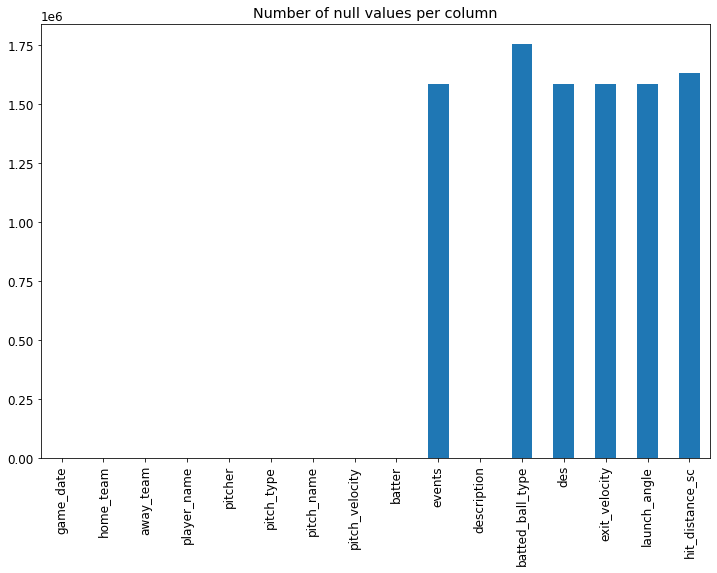

In [17]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
all_MLB_teams2015_2017_new.isnull().sum().plot.bar();
plt.title('Number of null values per column');

#### Approach for excluding records:

Each record represents an interaction between a pitcher and a batter (i.e., a pitch thrown by the pitcher to the batter).  The goal is to keep any interaction for which Statcast could provide valid measurements for the metrics `launch_speed`, `launch_angle`, and `hit_distance_sc`.

In order to do so, non-batted ball records will be excluded. <br>

- Drop all `events` = NaN which represent interactions where the batter did not make contact with the ball or the batter made contact with the ball but it was hit foul (e.g., ball, foul, called strike, swinging strike, blocked ball, foul tip, intentional ball, foul bunt, swinging strike blocked, missed bunt, pitchout)

- Drop all `batted_ball_type` = NaN which represents other remaining events where there was not a batted ball (e.g., strikeout, walk, hit by pitch, intentional walk, caught stealing, etc.)

#### Examine `events` column for missingness.

In [18]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
def value_counts_func(df, var, bar, title=''):
    value_counts = df[var].value_counts(dropna=False)
    value_percents = round(df[var].value_counts(normalize=True, dropna=False)*100, 2)
    df_ = pd.DataFrame({'counts': value_counts, 'percentage': value_percents}).rename_axis(var).reset_index()
    
    if bar:
        # Create a vertical bar plot
        # Note: figsize: a tuple (width, height) in inches
        #       rot: rotation for ticks (xticks for vertical, yticks for horizontal plots)
        percents = df[var].value_counts(normalize=True, dropna=False)*100
        ax = percents.plot(kind='bar', figsize=(10, 6), rot=0);
        ax.set_title(title);
        ax.set_ylabel('Percentage');

    format_dict = {'percentage': '{:.2f}'}
    return df_.style.format(format_dict).hide_index()

In [19]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new, 'events', bar=False)

events,counts,percentage
nan,1586052,74.12
field_out,223381,10.44
strikeout,116120,5.43
single,82491,3.85
walk,42138,1.97
double,24898,1.16
home_run,16629,0.78
force_out,11500,0.54
grounded_into_double_play,11266,0.53
hit_by_pitch,5019,0.23


In [20]:
# Detect missing values in a Series
# Note: True if missing, False if not missing
#all_MLB_teams2015_2017_new.events.isna() # alias of isnull()
null_events = all_MLB_teams2015_2017_new.events.isnull()
all_MLB_teams2015_2017_new[null_events]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,pitch_velocity,batter,events,description,batted_ball_type,des,exit_velocity,launch_angle,hit_distance_sc
2139919,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,93.6,572761.0,NaN,called_strike,NaN,NaN,NaN,NaN,NaN
2139918,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,93.4,572761.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
2139917,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,94.8,572761.0,NaN,foul,NaN,NaN,NaN,NaN,NaN
2139916,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,91.6,572761.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
2139915,2015-04-05,CHC,STL,Jon Lester,452657.0,CU,Curveball,75.9,572761.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2017-10-01,NYY,TOR,Roberto Osuna,532077.0,FF,4-Seam Fastball,96.0,595885.0,NaN,called_strike,NaN,NaN,NaN,NaN,NaN
4,2017-10-01,NYY,TOR,Roberto Osuna,532077.0,FT,2-Seam Fastball,95.9,595885.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
3,2017-10-01,NYY,TOR,Roberto Osuna,532077.0,CH,Changeup,82.8,595885.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
2,2017-10-01,NYY,TOR,Roberto Osuna,532077.0,FF,4-Seam Fastball,94.7,595885.0,NaN,ball,NaN,NaN,75.0,-7.6433,20.0


#### What types of interactions occurred for missing `events`?

In [21]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new[null_events], 'description', bar=False)

description,counts,percentage
ball,676751,42.67
foul,371731,23.44
called_strike,333190,21.01
swinging_strike,131229,8.27
blocked_ball,45367,2.86
foul_tip,10704,0.67
foul_bunt,6228,0.39
intent_ball,4724,0.30
swinging_strike_blocked,4312,0.27
missed_bunt,1299,0.08


#### Drop missing values from `events` column.

In [22]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
all_MLB_teams2015_2017_new.dropna(subset=['events'], inplace=True)

#### Examine `batted_ball_type` column for missingness.

batted_ball_type,counts,percentage
ground_ball,178646,32.25
nan,166927,30.14
line_drive,99714,18.00
fly_ball,81752,14.76
popup,26829,4.84


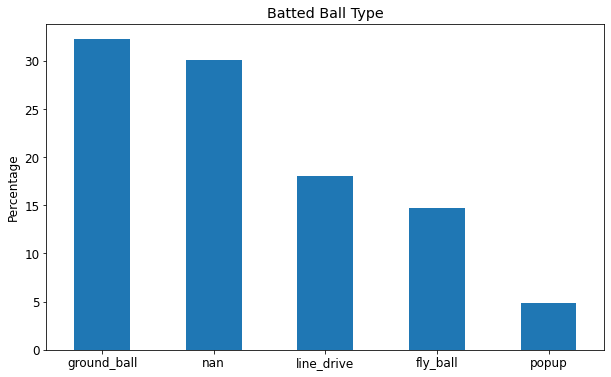

In [23]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new, 'batted_ball_type', bar=True, title='Batted Ball Type')

In [24]:
# Detect missing values in a Series
# Note: True if missing, False if not missing
#all_MLB_teams2015_2017_new.batted_ball_type.isna() # alias of isnull()
null_batted_ball_type = all_MLB_teams2015_2017_new.batted_ball_type.isnull()
all_MLB_teams2015_2017_new[null_batted_ball_type]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,pitch_velocity,batter,events,description,batted_ball_type,des,exit_velocity,launch_angle,hit_distance_sc
2139906,2015-04-05,CHC,STL,Jon Lester,452657.0,CU,Curveball,76.8,425509.0,strikeout,swinging_strike,NaN,Jhonny Peralta strikes out swinging.,NaN,NaN,NaN
2139901,2015-04-05,CHC,STL,Jon Lester,452657.0,FC,Cutter,89.9,571431.0,strikeout,swinging_strike,NaN,Matt Adams strikes out swinging.,NaN,NaN,NaN
2139890,2015-04-05,CHC,STL,Adam Wainwright,425794.0,FC,Cutter,84.9,519203.0,strikeout,called_strike,NaN,Anthony Rizzo called out on strikes.,NaN,NaN,NaN
2139882,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,92.0,425877.0,strikeout,swinging_strike,NaN,Yadier Molina strikes out swinging.,NaN,NaN,NaN
2139875,2015-04-05,CHC,STL,Jon Lester,452657.0,FF,4-Seam Fastball,89.6,543939.0,walk,ball,NaN,Kolten Wong walks.,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2017-10-01,NYY,TOR,Domingo German,593334.0,FF,4-Seam Fastball,97.0,606192.0,strikeout,swinging_strike,NaN,Teoscar Hernandez strikes out swinging.,NaN,NaN,NaN
44,2017-10-01,NYY,TOR,Ryan Tepera,572193.0,FC,Cutter,88.9,592122.0,strikeout,swinging_strike,NaN,Tyler Austin strikes out swinging.,NaN,NaN,NaN
38,2017-10-01,NYY,TOR,Ryan Tepera,572193.0,FC,Cutter,89.5,543305.0,strikeout,swinging_strike,NaN,Aaron Hicks strikes out swinging.,NaN,NaN,NaN
29,2017-10-01,NYY,TOR,Ben Heller,621294.0,CU,Curveball,82.8,620446.0,strikeout,swinging_strike,NaN,Richard Urena strikes out swinging.,NaN,NaN,NaN


#### What types of `events` occurred for missing `batted_ball_type`?

In [25]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new[null_batted_ball_type], 'events', bar=False)

events,counts,percentage
strikeout,116120,69.56
walk,42138,25.24
hit_by_pitch,5019,3.01
intent_walk,1884,1.13
caught_stealing_2b,696,0.42
strikeout_double_play,435,0.26
pickoff_caught_stealing_2b,131,0.08
other_out,120,0.07
catcher_interf,113,0.07
pickoff_1b,95,0.06


#### Drop missing values from `batted_ball_type` column.

In [26]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
all_MLB_teams2015_2017_new.dropna(subset=['batted_ball_type'], inplace=True)

#### Confirm whether the values for `events` and `batted_ball_type` are valid (i.e., values could provide valid measurements for Statcast metrics).

In [27]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new, 'events', bar=False)

events,counts,percentage
field_out,223381,57.73
single,82491,21.32
double,24898,6.43
home_run,16629,4.30
force_out,11500,2.97
grounded_into_double_play,11266,2.91
field_error,4816,1.24
sac_fly,3549,0.92
sac_bunt,3149,0.81
triple,2607,0.67


batted_ball_type,counts,percentage
ground_ball,178646,46.17
line_drive,99714,25.77
fly_ball,81752,21.13
popup,26829,6.93


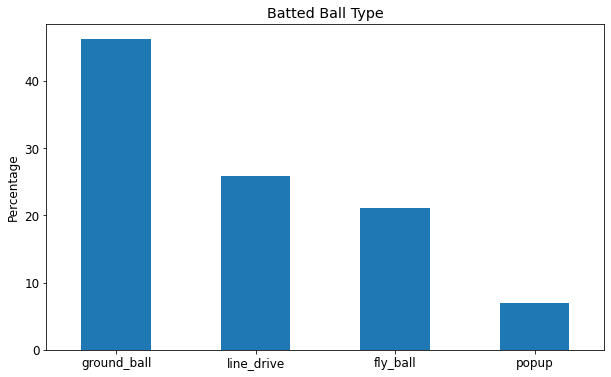

In [28]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new, 'batted_ball_type', bar=True, title='Batted Ball Type')

In [29]:
all_MLB_teams2015_2017_new.batted_ball_type.value_counts(dropna=False).sum()

386941

In [30]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(all_MLB_teams2015_2017_new.events.fillna(' NaN'), all_MLB_teams2015_2017_new.batted_ball_type.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

batted_ball_type,fly_ball,ground_ball,line_drive,popup,Total
events,,,,,
double,3502,3342,17914,140,24898
double_play,222,109,930,87,1348
field_error,159,4349,199,109,4816
field_out,60230,103445,33726,25980,223381
fielders_choice,0,301,0,0,301
fielders_choice_out,0,914,2,3,919
force_out,47,11342,74,37,11500
grounded_into_double_play,0,11266,0,0,11266
home_run,11547,0,5082,0,16629


Note: The above frequencies confirm valid values.

In [31]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = all_MLB_teams2015_2017_new.isnull().sum()
total_counts = all_MLB_teams2015_2017_new.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
pitch_type,701,0.18
pitch_name,701,0.18
pitch_velocity,459,0.12
des,2,0.00
exit_velocity,66,0.02
launch_angle,66,0.02
hit_distance_sc,46472,12.01


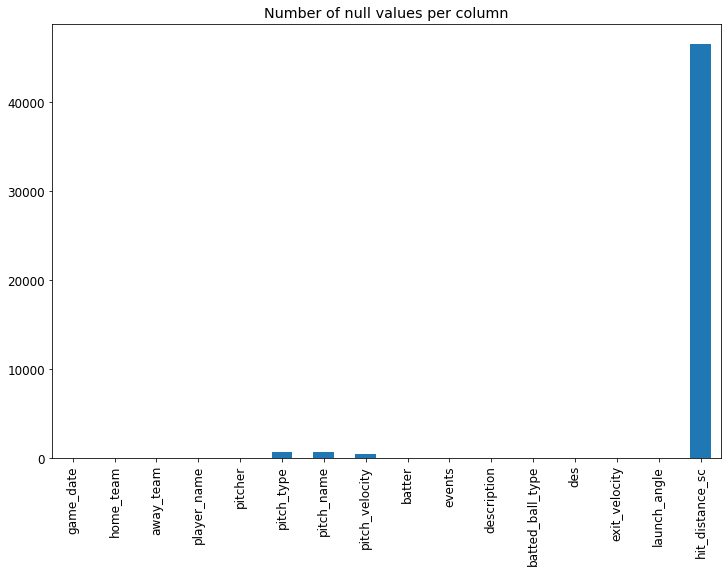

In [32]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
all_MLB_teams2015_2017_new.isnull().sum().plot.bar();
plt.title('Number of null values per column');

Note: There are still missing values for the following variables: `pitch_name`, `pitch_velocity`, `exit_velocity`, `launch_angle`. These variables will be used in the modeling and observations with missing values will be dropped.

#### Drop missing values from `pitch_name`, `pitch_velocity`, `exit_velocity`, `launch_angle` columns.

In [33]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
all_MLB_teams2015_2017_new.dropna(subset=['pitch_name', 'pitch_velocity', 'exit_velocity', 'launch_angle'], inplace=True)

### Summarize the DataFrame

In [34]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
all_MLB_teams2015_2017_new.drop(['pitcher', 'batter'], axis=1).describe()

,pitch_velocity,exit_velocity,launch_angle,hit_distance_sc
count,386112.000000,386112.000000,386112.000000,340221.000000
mean,88.938052,87.228387,10.662181,170.446680
std,5.809726,14.532315,27.245971,136.700367
min,41.500000,5.200000,-88.890000,0.000000
25%,85.100000,80.000000,-8.987000,22.000000
50%,90.300000,89.300000,10.605000,169.000000
75%,93.300000,98.100000,28.520775,294.000000
max,105.400000,123.400000,89.850000,504.000000


In [35]:
# Describe object columns (e.g. categorical, strings, or timestamps)
# Generates descriptive summary statistics of the count, unique values, top values, and frequency
# Note: "top" is the most common value; "freq" is the most common value's frequency
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
all_MLB_teams2015_2017_new.drop(['home_team', 'away_team', 'player_name', 'des'], axis=1).describe(include='object')

,game_date,pitch_type,pitch_name,events,description,batted_ball_type
count,386112,386112,386112,386112,386112,386112
unique,537,16,16,16,4,4
top,2015-09-30,FF,4-Seam Fastball,field_out,hit_into_play,ground_ball
freq,974,131254,131254,222928,249245,178259


In [36]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(all_MLB_teams2015_2017_new.pitch_name.fillna(' NaN'), all_MLB_teams2015_2017_new.pitch_type.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

pitch_type,CH,CU,EP,FA,FC,FF,FO,FS,FT,KC,KN,PO,SC,SI,SL,UN,Total
pitch_name,,,,,,,,,,,,,,,,,
2-Seam Fastball,0,0,0,0,0,0,0,0,59444,0,0,0,0,0,0,0,59444
4-Seam Fastball,0,0,0,0,0,131254,0,0,0,0,0,0,0,0,0,0,131254
Changeup,43883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43883
Curveball,0,26046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26046
Cutter,0,0,0,0,21484,0,0,0,0,0,0,0,0,0,0,0,21484
Eephus,0,0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,114
Fastball,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3
Forkball,0,0,0,0,0,0,126,0,0,0,0,0,0,0,0,0,126
Knuckle Ball,0,0,0,0,0,0,0,0,0,0,2094,0,0,0,0,0,2094


#### Drop low frequency `pitch_name` observations

In [37]:
# Return elements, either from `x` or `y`, depending on `condition`
all_MLB_teams2015_2017_new['pitch_name_low_freq'] = np.where(all_MLB_teams2015_2017_new.pitch_name.isin(['Eephus', 'Fastball', 'Forkball', 'Pitch Out', 'Screwball', 'Unknown']), 1, 0)

pitch_name_low_freq,counts,percentage
0,385848,99.93
1,264,0.07


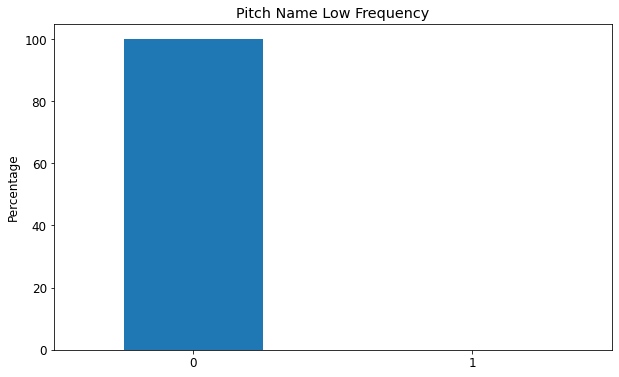

In [38]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(all_MLB_teams2015_2017_new, 'pitch_name_low_freq', bar=True, title='Pitch Name Low Frequency')

In [39]:
# Excluding low frequency values
all_MLB_teams2015_2017_new = all_MLB_teams2015_2017_new[all_MLB_teams2015_2017_new.pitch_name_low_freq == 0]
all_MLB_teams2015_2017_new.drop('pitch_name_low_freq', axis=1, inplace=True)

In [40]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(all_MLB_teams2015_2017_new.shape[0], all_MLB_teams2015_2017_new.shape[1]))

Rows: 385848, Cols: 16


In [41]:
# Calculate the correlation matrix using the default method (Pearson correlation)
baseball_correlations = all_MLB_teams2015_2017_new.drop(['pitcher', 'batter'], axis=1).corr(method='pearson')
round(baseball_correlations, 3)

,pitch_velocity,exit_velocity,launch_angle,hit_distance_sc
pitch_velocity,1.000,0.079,0.007,0.017
exit_velocity,0.079,1.000,0.187,0.352
launch_angle,0.007,0.187,1.000,0.733
hit_distance_sc,0.017,0.352,0.733,1.000


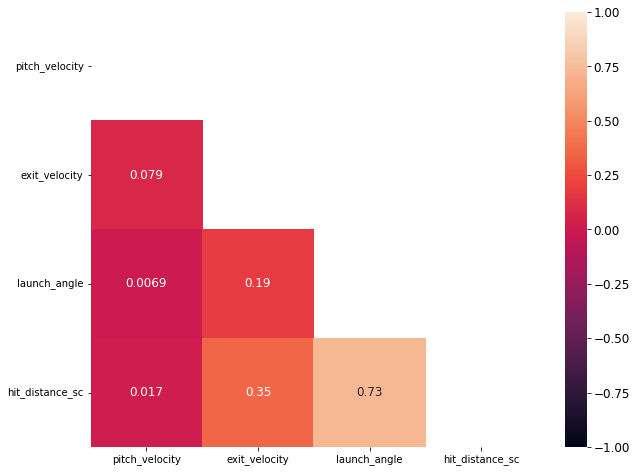

In [42]:
# Create a figure and a set of subplots
# Note: figsize: a tuple (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 8));

# Return an array of zeros with the same shape and type as a given array
mask = np.zeros_like(baseball_correlations, dtype=np.bool)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix (color-encoded) using Seaborn's .heatmap() function
# Note: vmin, vmax: values to anchor the colormap, otherwise they are inferred from the data & other keyword arguments
#       annot: write the data value in each cell
ax = sns.heatmap(baseball_correlations, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va='center', rotation=0);

plt.show();

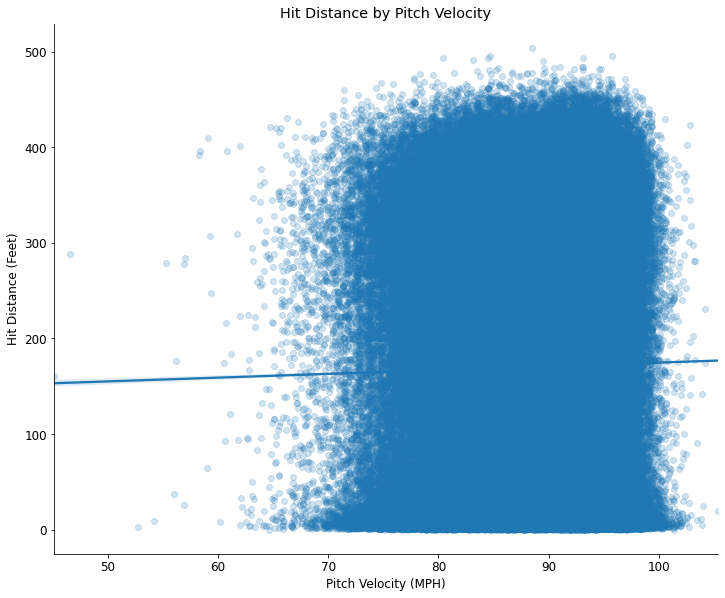

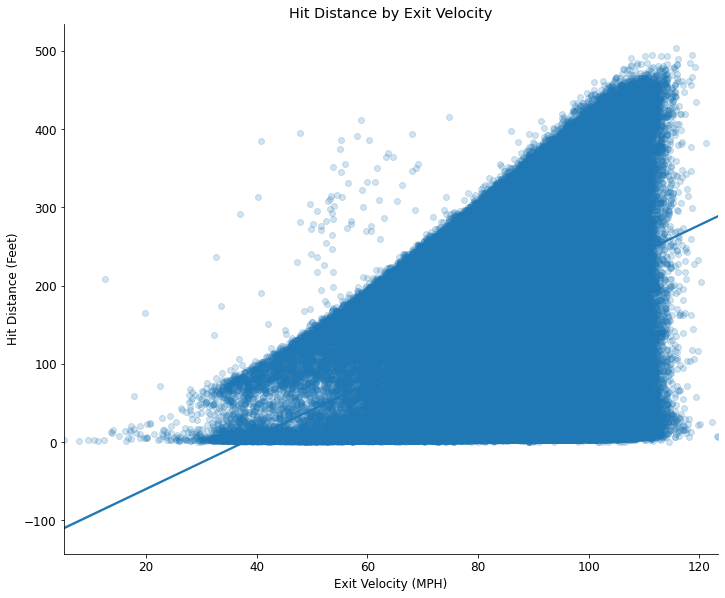

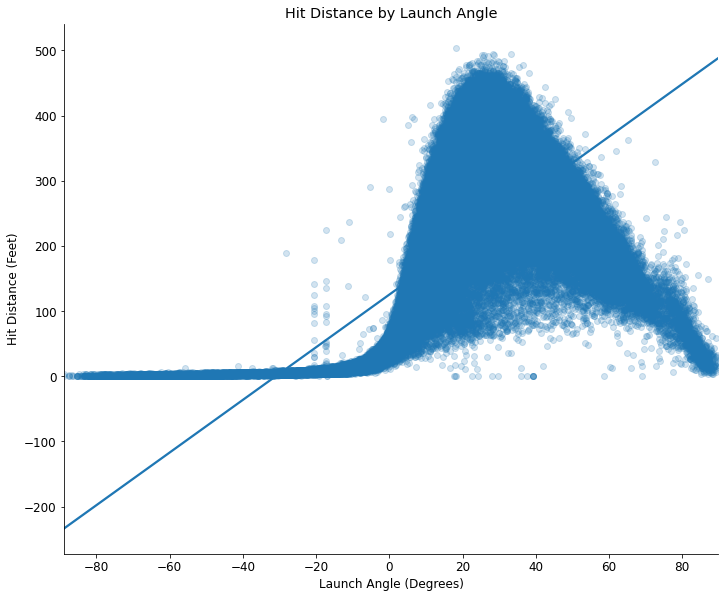

In [43]:
# Plot a simple linear relationship between two variables using Seaborn scatterplot with regression line
# Note: data: DataFrame name
#       fit_reg=True estimates and plots a regression model relating the x and y variables
#       size: height (in inches) of each facet
#       aspect: aspect ratio of each facet, so that "aspect * size" gives the width of each facet in inches
#       scatter_kws=alpha: blending value, between 0 (transparent) and 1 (opaque)
sns.lmplot(x='pitch_velocity', y='hit_distance_sc', data=all_MLB_teams2015_2017_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Pitch Velocity (MPH)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Pitch Velocity');
plt.show()
sns.lmplot(x='exit_velocity', y='hit_distance_sc', data=all_MLB_teams2015_2017_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Exit Velocity');
plt.show()
sns.lmplot(x='launch_angle', y='hit_distance_sc', data=all_MLB_teams2015_2017_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Launch Angle');

In [44]:
# Create feature column variables
feature_cols = ['pitch_velocity', 'exit_velocity', 'launch_angle']

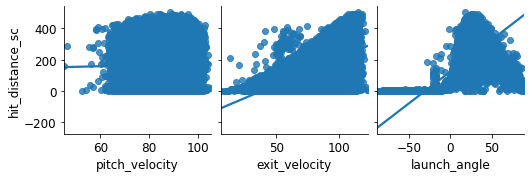

In [45]:
# Plot pairwise relationships (scatterplots for joint relationships) using Seaborn's .pairplot() function
# Note: kind: kind of plot for the non-identity relationships ('scatter' or 'reg')
sns.pairplot(all_MLB_teams2015_2017_new, x_vars=feature_cols, y_vars='hit_distance_sc', kind='reg');

In [46]:
# For each pitch name group, describe hit distance:
all_MLB_teams2015_2017_new.groupby(by='pitch_name').hit_distance_sc.describe()

,count,mean,std,min,25%,50%,75%,max
pitch_name,,,,,,,,
2-Seam Fastball,52265.0,153.447757,137.376798,0.0,14.0,125.0,281.00,493.0
4-Seam Fastball,116587.0,191.587784,134.702366,0.0,44.0,209.0,309.00,495.0
Changeup,38322.0,160.182924,136.715200,0.0,17.0,147.0,285.00,504.0
Curveball,23077.0,162.518958,134.347498,0.0,21.0,152.0,285.00,479.0
Cutter,18945.0,167.303299,134.805694,0.0,23.0,162.0,287.00,491.0
Knuckle Ball,1841.0,168.922868,137.441519,1.0,19.0,165.0,296.00,477.0
Knuckle Curve,6555.0,144.751945,133.654532,0.0,14.0,108.0,266.50,463.0
Sinker,28877.0,150.902206,137.648596,0.0,13.0,118.0,279.00,478.0
Slider,48085.0,168.338276,135.435076,0.0,22.0,166.0,289.00,495.0


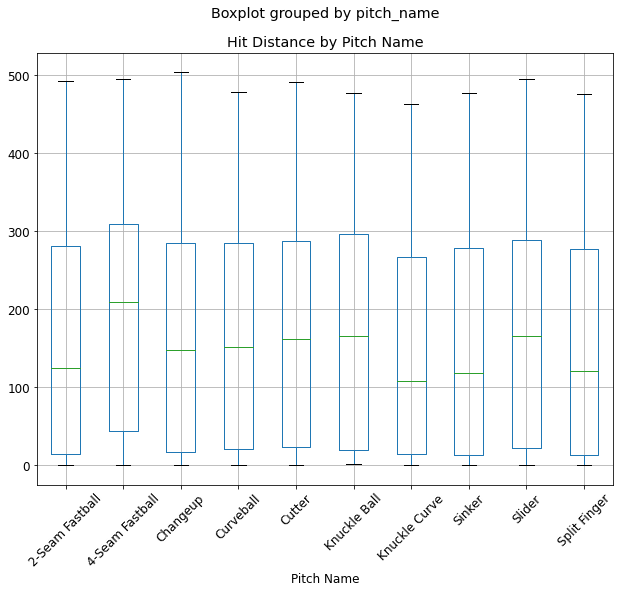

In [47]:
# Create box plots
# Note: column: used to limit data to a subset of columns
#       by: used to form box plots for separate groups
#       rot: rotation angle of labels (in degrees) with respect to the screen coordinate sytem
#       figsize: a tuple (width, height) in inches
all_MLB_teams2015_2017_new.boxplot(column='hit_distance_sc', by='pitch_name', rot=45, figsize=(10, 8));
plt.xlabel('Pitch Name');
plt.title('Hit Distance by Pitch Name');

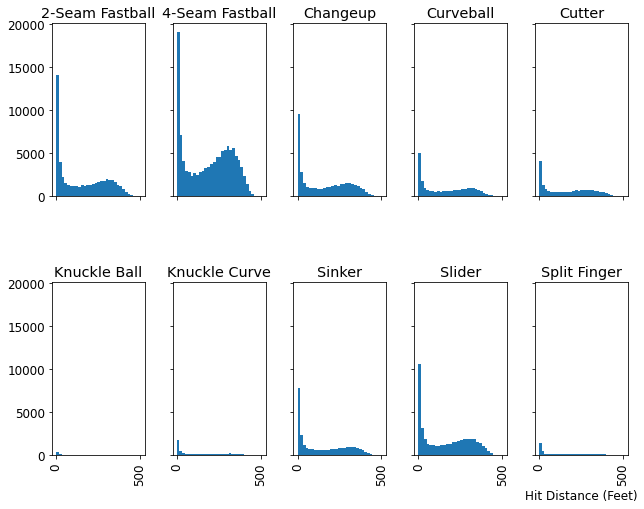

In [48]:
# Create histograms
# Note: column: used to limit data to a subset of columns
#       by: used to form histograms for separate groups
#       sharex: share x axis and set some x axis labels to invisible
#       sharey: share y axis and set some y axis labels to invisible
#       layout: tuple of (rows, columns) for the layout of the histograms
#       figsize: a tuple (width, height) in inches
#       bins: number of histogram bins to be used
all_MLB_teams2015_2017_new.hist(column='hit_distance_sc', by='pitch_name', sharex=True, sharey=True, layout=(2, 5), figsize=(10, 8), bins=30);
plt.xlabel('Hit Distance (Feet)');
plt.ylabel('Frequency');

### Data Modeling

### Using Linear Regression

#### Build and train linear regression model

Note: <br>
- `LinearRegression` does not support missing values for targets.

In [49]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = all_MLB_teams2015_2017_new.isnull().sum()
total_counts = all_MLB_teams2015_2017_new.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
des,2,0.00
hit_distance_sc,45864,11.89


Drop missing values from `hit_distance_sc` column.

In [50]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
all_MLB_teams2015_2017_new.dropna(subset=['hit_distance_sc'], inplace=True)

Create dummy variables for `pitch_name`.

In [51]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
all_MLB_teams2015_2017_new = all_MLB_teams2015_2017_new.join(pd.get_dummies(all_MLB_teams2015_2017_new.pitch_name, prefix='pitch_name', drop_first=True))
all_MLB_teams2015_2017_new.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,pitch_velocity,batter,events,...,hit_distance_sc,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Ball,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split Finger
2139899,2015-04-05,CHC,STL,Adam Wainwright,425794.0,FC,Cutter,88.1,451594.0,double,...,209.0,0,0,0,1,0,0,0,0,0
2139886,2015-04-05,CHC,STL,Adam Wainwright,425794.0,FC,Cutter,88.1,516770.0,field_out,...,12.0,0,0,0,1,0,0,0,0,0
2139865,2015-04-05,CHC,STL,Jon Lester,452657.0,FC,Cutter,88.1,572761.0,single,...,189.0,0,0,0,1,0,0,0,0,0
2139861,2015-04-05,CHC,STL,Adam Wainwright,425794.0,FC,Cutter,87.8,458085.0,double,...,260.0,0,0,0,1,0,0,0,0,0
2139852,2015-04-05,CHC,STL,Adam Wainwright,425794.0,FF,4-Seam Fastball,89.8,424325.0,field_out,...,364.0,1,0,0,0,0,0,0,0,0


### Building Phase

#### Predicting Hit Distance 

In [52]:
# Create a list of features
feature_cols = ['pitch_name_4-Seam Fastball', 'pitch_name_Changeup', 'pitch_name_Curveball', 'pitch_name_Cutter',
                'pitch_name_Knuckle Ball', 'pitch_name_Knuckle Curve', 'pitch_name_Sinker', 'pitch_name_Slider', 'pitch_name_Split Finger',
                'pitch_velocity', 'exit_velocity', 'launch_angle']

In [53]:
# Create X and y
X = all_MLB_teams2015_2017_new[feature_cols]
y = all_MLB_teams2015_2017_new.hit_distance_sc

In [54]:
# Split X and y into training and testing sets
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 237988
Length of y_train: 237988
Length of X_test: 101996
Length of y_test: 101996


#### Compute Baseline (Null) RMSE
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

Note: Using a null model (i.e., using the mean value for the prediction). <br>

Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [55]:
# Create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_train
y_null.fill(y_train.mean())
y_null

array([170.17825269, 170.17825269, 170.17825269, ..., 170.17825269,
       170.17825269, 170.17825269])

In [56]:
# Mean squared error (MSE) regression loss
print('Baseline (Null) MSE:', round(metrics.mean_squared_error(y_test, y_null), 3))

# Root mean squared error (RMSE) regression loss
print('Baseline (Null) RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_null)), 3))

Baseline (Null) MSE: 18699.423
Baseline (Null) RMSE: 136.746


In [57]:
# Instantiate a regressor that makes predictions using simple rules and fit dummy regressor
# Note: stragegy: strategy to use to generate predictions
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)

# Mean squared error (MSE) regression loss
print('Baseline (Null) MSE:', round(metrics.mean_squared_error(y_test, y_pred), 3))

# Root mean squared error (RMSE) regression loss
print('Baseline (Null) RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))

Baseline (Null) MSE: 18699.423
Baseline (Null) RMSE: 136.746


#### Perform training with OLS linear regression

In [58]:
# Instantiate an ordinary least squares LinearRegression model and fit linear model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print the intercept and coefficient(s)
print('Intercept:', round(linreg.intercept_, 4))
print('Coefficient(s):', list(zip(feature_cols, np.round(linreg.coef_, 4))))

Intercept: -28.3384
Coefficient(s): [('pitch_name_4-Seam Fastball', 6.0037), ('pitch_name_Changeup', 2.3426), ('pitch_name_Curveball', -2.7181), ('pitch_name_Cutter', 1.3687), ('pitch_name_Knuckle Ball', -0.2794), ('pitch_name_Knuckle Curve', -6.9506), ('pitch_name_Sinker', -0.6188), ('pitch_name_Slider', 1.1957), ('pitch_name_Split Finger', -0.3616), ('pitch_velocity', -0.5071), ('exit_velocity', 2.2517), ('launch_angle', 3.8065)]


In [59]:
# Get the coefficient for each feature
name = X.columns
coef = np.round(linreg.coef_, 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,pitch_name_4-Seam Fastball,6.0037
1,pitch_name_Changeup,2.3426
2,pitch_name_Curveball,-2.7181
3,pitch_name_Cutter,1.3687
4,pitch_name_Knuckle Ball,-0.2794
5,pitch_name_Knuckle Curve,-6.9506
6,pitch_name_Sinker,-0.6188
7,pitch_name_Slider,1.1957
8,pitch_name_Split Finger,-0.3616
9,pitch_velocity,-0.5071


In [60]:
# Returns the coefficient of determination R^2 of the prediction
print('R^2:', round(linreg.score(X_test, y_test), 3))

R^2: 0.591


In [61]:
# Predict using the linear model
y_pred_linreg = linreg.predict(X_test)

In [62]:
# Mean squared error (MSE) regression loss
print('Training MSE:', round(metrics.mean_squared_error(y_train, linreg.predict(X_train)), 3))

# Root mean squared error (RMSE) regression loss
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train))), 3))
print('')

# Mean squared error (MSE) regression loss
print('Testing MSE:', round(metrics.mean_squared_error(y_test, y_pred_linreg), 3))

# Root mean squared error (RMSE) regression loss
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)), 3))

Training MSE: 7656.883
Training RMSE: 87.504

Testing MSE: 7642.103
Testing RMSE: 87.419


### Operational Phase

In [63]:
# Function to make predictions 
def prediction(X_test, regr_object, model_type_text): 
  
    # Predict using the regression model
    # Note: For a regression model, the predicted value based on X is returned
    y_pred = regr_object.predict(X_test)

    print('Results Using {}:'.format(model_type_text))
    print('Predicted values:')
    print(y_pred)
    print('')
    return y_pred

In [64]:
# Function to calculate evaluation metrics
def eval_metrics(y_test, y_pred, regr_object):
    
    # Mean squared error (MSE) regression loss
    print('Training MSE:', round(metrics.mean_squared_error(y_train, regr_object.predict(X_train)), 3))

    # Root mean squared error (RMSE) regression loss
    training_rmse = sqrt(metrics.mean_squared_error(y_train, regr_object.predict(X_train)))
    print('Training RMSE:', round(training_rmse, 3))
    print('')   
  
    # Mean squared error (MSE) regression loss
    print('Testing MSE:', round(metrics.mean_squared_error(y_test, y_pred), 3))

    # Root mean squared error (RMSE) regression loss
    testing_rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE:', round(testing_rmse, 3))
    
    if training_rmse < testing_rmse:
        print('Testing RMSE > Training RMSE')
        print('-> Overfitting!')
    else:
        print('Testing RMSE < Training RMSE')
        print('-> Not overfitting')

#### Prediction using OLS linear regression

In [65]:
model_type_text='OLS Linear Regression Model'
y_pred_linreg = prediction(X_test, linreg, model_type_text)
eval_metrics(y_test, y_pred_linreg, linreg)

Results Using OLS Linear Regression Model:
Predicted values:
[242.89292498 315.5271003  305.89855546 ...  97.22629471 132.53603745
 336.59550073]

Training MSE: 7656.883
Training RMSE: 87.504

Testing MSE: 7642.103
Testing RMSE: 87.419
Testing RMSE < Training RMSE
-> Not overfitting


#### Perform training with OLS linear regression with standardized scaled features

In [66]:
# Instantiate a StandardScaler object and compute the mean and std to be used for later scaling
# --> Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

# Perform standardization by centering and scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Instantiate an ordinary least squares LinearRegression model and fit linear model
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# Get the coefficient for each feature
name = X.columns
coef = np.round(linreg_scaled.coef_, 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,pitch_name_4-Seam Fastball,2.8494
1,pitch_name_Changeup,0.7414
2,pitch_name_Curveball,-0.6824
3,pitch_name_Cutter,0.314
4,pitch_name_Knuckle Ball,-0.0207
5,pitch_name_Knuckle Curve,-0.9579
6,pitch_name_Sinker,-0.1731
7,pitch_name_Slider,0.4163
8,pitch_name_Split Finger,-0.0449
9,pitch_velocity,-2.94


In [69]:
# Returns the coefficient of determination R^2 of the prediction
print('R^2:', round(linreg_scaled.score(X_test_scaled, y_test), 3))

R^2: 0.591


In [70]:
# Predict using the linear model
y_pred_linreg_scaled = linreg_scaled.predict(X_test_scaled)

In [71]:
# Mean squared error (MSE) regression loss
print('Training MSE:', round(metrics.mean_squared_error(y_train, linreg_scaled.predict(X_train_scaled)), 3))

# Root mean squared error (RMSE) regression loss
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, linreg_scaled.predict(X_train_scaled))), 3))
print('')

# Mean squared error (MSE) regression loss
print('Testing MSE:', round(metrics.mean_squared_error(y_test, y_pred_linreg_scaled), 3))

# Root mean squared error (RMSE) regression loss
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg_scaled)), 3))

Training MSE: 7656.883
Training RMSE: 87.504

Testing MSE: 7642.103
Testing RMSE: 87.419


#### Use Regularization to optimize model

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting.
- If the model is more complex, regularization tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

The goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

#### Advice for Applying Regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge Regression.

Standardization is necessary for regularized regression because the beta values for each predictor variable must be on the same scale. If betas are different sizes just because of the scale of predictor variables, the regularization term can't determine which betas are more/less important based on their size.

In [72]:
# Instantiate a StandardScaler object
# --> Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit to data, then transform it
Xs = scaler.fit_transform(X)

If you wish to standardize, use `sklearn.preprocessing.StandardScaler` before calling `fit` on an estimator with `normalize=False`. This will provide identical results with `normalize=True`.

In [73]:
# Instantiate an ordinary least squares LinearRegression model and fit linear model
# Note: normalize: if True, the regressors X will be normalized before regression by subtracting the mean and 
#                  dividing by the l2-norm
linreg_s = LinearRegression()
linreg_s.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Cross-validate the OLS linear regression $R^2$ with 10-fold cross-validation.

In [74]:
# Evaluate a score by cross-validation
# Note: cv: number of folds in cross-validation
linreg_scores_r2 = cross_val_score(linreg_s, Xs, y, cv=10)

print('CV scores for each fold:')
print(linreg_scores_r2)
print('')
print('Mean CV R^2:', round(np.mean(linreg_scores_r2), 3))

CV scores for each fold:
[0.63588095 0.62494878 0.62125756 0.59475953 0.5858589  0.58684429
 0.56232487 0.53629889 0.57176703 0.57926787]

Mean CV R^2: 0.59


#### Cross-validate the OLS linear regression MSE with 10-fold cross-validation.

In [75]:
# Evaluate a score by cross-validation
# Note: scoring: string (see model evaluation documentation) or a scorer callable object/function
#       cv: number of folds in cross-validation
linreg_scores_mse = -cross_val_score(linreg_s, Xs, y, scoring='neg_mean_squared_error', cv=10)

print('CV scores for each fold:')
print(linreg_scores_mse)
print('')
print('Mean CV MSE:', round(np.mean(linreg_scores_mse), 3))
print('Mean CV RMSE:', round(np.mean(np.sqrt(linreg_scores_mse)), 3))

CV scores for each fold:
[6743.71431693 6885.51337795 7039.44507801 7545.96591198 7811.38199134
 7834.32257052 8107.51175414 8607.81664247 8112.25869246 7940.55286518]

Mean CV MSE: 7662.848
Mean CV RMSE: 87.476


#### Find an optimal value for Ridge regression alpha using `RidgeCV`.

[RidgeCV documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

*Once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit!

In [76]:
# Return numbers spaced evenly on a log scale
# Note: num: number of samples to generate
ridge_alphas = np.logspace(0, 5, num=200)

# Instantiate a Ridge regression with built-in cross-validation RidgeCV model and fit Ridge model
# Note: alphas: array of alpha values (regularization strength) to try
#       cv: number of folds in cross-validation
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y)

print(optimal_ridge.alpha_)

365.4383070957258


In [77]:
# Instantiate a linear least squares with l2-norm regularization RidgeRegression model and fit Ridge model
# Note: alpha: regularization strength; defaults to 1.0
#       -> alpha=0 has no regularization strength, equivalent to a basic linear regression (ordinary least square)
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(Xs, y)

Ridge(alpha=365.4383070957258, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Cross-validate the Ridge regression $R^2$ with 10-fold cross-validation using the optimal alpha.

In [78]:
# Evaluate a score by cross-validation
# Note: cv: number of folds in cross-validation
ridge_scores_r2 = cross_val_score(ridge, Xs, y, cv=10)

print('CV scores for each fold:')
print(ridge_scores_r2)
print('')
print('Mean CV R^2:', round(np.mean(ridge_scores_r2), 3))

CV scores for each fold:
[0.6357577  0.62486512 0.62117825 0.59473757 0.58584073 0.58682543
 0.56238344 0.53644291 0.57185043 0.57933384]

Mean CV R^2: 0.59


#### Cross-validate the Ridge regression MSE with 10-fold cross-validation using the optimal alpha.

In [79]:
# Evaluate a score by cross-validation
# Note: scoring: string (see model evaluation documentation) or a scorer callable object/function
#       cv: number of folds in cross-validation
ridge_scores_mse = -cross_val_score(ridge, Xs, y, scoring='neg_mean_squared_error', cv=10)

print('CV scores for each fold:')
print(ridge_scores_mse)
print('')
print('Mean CV MSE:', round(np.mean(ridge_scores_mse), 3))
print('Mean CV RMSE:', round(np.mean(np.sqrt(ridge_scores_mse)), 3))

CV scores for each fold:
[6745.99701322 6887.04935234 7040.91922465 7546.3749337  7811.72467112
 7834.68026397 8106.42678125 8605.14324835 8110.67870008 7939.30779914]

Mean CV MSE: 7662.83
Mean CV RMSE: 87.476


#### Find an optimal value for Lasso regression alpha using `LassoCV`.

[LassoCV documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). It is very similar to `RidgeCV`.

*Once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Lasso, unlike Ridge, performs best searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over. It is recommended to let sklearn choose the range of alphas.

**Tip:** If you find your CV taking a long time and you're not sure if its working set `verbose=1`.

In [80]:
# Instantiate a Lasso linear LassoCV model with iterative fitting along a regularization path and fit Lasso model
# Note: n_alphas: number of alphas along the regularization path
#       cv: number of folds in cross-validation
#       verbose: amount of verbosity (i.e., show progress as dots)
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xs, y)

print(optimal_lasso.alpha_)

0.10013706120770259


In [81]:
# Instantiate a Linear Model trained with L1 prior as regularizer (aka the Lasso) and fit Lasso model with coordinate descent
# Note: alpha: constant that multiplies the L1 term; defaults to 1.0
#       -> alpha=0 has no regularization strength; equivalent to a basic linear regression (ordinary least square)
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(Xs, y)

Lasso(alpha=0.10013706120770259, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Cross-validate the Lasso regression $R^2$ with 10-fold cross-validation using the optimal alpha.

In [82]:
# Evaluate a score by cross-validation
# Note: cv: number of folds in cross-validation
lasso_scores_r2 = cross_val_score(lasso, Xs, y, cv=10)

print('CV scores for each fold:')
print(lasso_scores_r2)
print('')
print('Mean CV R^2:', round(np.mean(lasso_scores_r2), 3))

CV scores for each fold:
[0.63577378 0.6248693  0.62118154 0.59474454 0.58577288 0.58678443
 0.56239268 0.53643311 0.57188002 0.57936624]

Mean CV R^2: 0.59


#### Cross-validate the Lasso regression MSE with 10-fold cross-validation using the optimal alpha.

In [83]:
# Evaluate a score by cross-validation
# Note: scoring: string (see model evaluation documentation) or a scorer callable object/function
#       cv: number of folds in cross-validation
lasso_scores_mse = -cross_val_score(lasso, Xs, y, scoring='neg_mean_squared_error', cv=10)

print('CV scores for each fold:')
print(lasso_scores_mse)
print('')
print('Mean CV MSE:', round(np.mean(lasso_scores_mse), 3))
print('Mean CV RMSE:', round(np.mean(np.sqrt(lasso_scores_mse)), 3))

CV scores for each fold:
[6745.69906087 6886.97265813 7040.85803569 7546.2451722  7813.0043965
 7835.45763974 8106.25555867 8605.32515183 8110.11809082 7938.69631202]

Mean CV MSE: 7662.863
Mean CV RMSE: 87.476


#### Find an optimal value for Elastic Net regression alpha using `ElasticNetCV`.

[ElasticNetCV documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization
- `l1_ratio`: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for `l1_ratio`: it will not allow it and break!

You can use `n_alphas` for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [84]:
# Return evenly spaced numbers over a specified interval
# Note: num: number of samples to generate
l1_ratios = np.linspace(0.01, 1.0, num=25)

# Instantiate an Elastic Net model with iterative fitting along a regularization path and fit Elastic Net model
# Note: l1_ratio: float between 0 and 1 passed to ElasticNet (scaling between L1 and L2 penalties)
#       n_alphas: number of alphas along the regularization path, used for each l1_ratio
#       cv: number of folds in cross-validation
#       verbose: amount of verbosity (i.e., show progress as dots)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
optimal_enet.fit(Xs, y)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.10013706120770259
1.0


In [85]:
# Instantiate a linear regression with combined L1 and L2 priors as regularizer and fit Elastic Net model with coordinate descent
# Note: alpha: constant that multiplies the penalty terms; defaults to 1.0
#       -> alpha=0 has no regularization strength; equivalent to a basic linear regression (ordinary least square)
#       l1_ratio: the ElasticNet mixing parameter, with 0 <= l1_ratio <= 1
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(Xs, y)

ElasticNet(alpha=0.10013706120770259, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

#### Cross-validate the Elastic Net regression $R^2$ with 10-fold cross-validation using the optimal alpha and l1_ratio.

In [86]:
# Evaluate a score by cross-validation
# Note: cv: number of folds in cross-validation
enet_scores_r2 = cross_val_score(enet, Xs, y, cv=10)

print('CV scores for each fold:')
print(enet_scores_r2)
print('')
print('Mean CV R^2:', round(np.mean(enet_scores_r2), 3))

CV scores for each fold:
[0.63577378 0.6248693  0.62118154 0.59474454 0.58577288 0.58678443
 0.56239268 0.53643311 0.57188002 0.57936624]

Mean CV R^2: 0.59


#### Cross-validate the Elastic Net regression MSE with 10-fold cross-validation using the optimal alpha and l1_ratio.

In [87]:
# Evaluate a score by cross-validation
# Note: scoring: string (see model evaluation documentation) or a scorer callable object/function
#       cv: number of folds in cross-validation
enet_scores_mse = -cross_val_score(enet, Xs, y, scoring='neg_mean_squared_error', cv=10)

print('CV scores for each fold:')
print(enet_scores_mse)
print('')
print('Mean CV MSE:', round(np.mean(enet_scores_mse), 3))
print('Mean CV RMSE:', round(np.mean(np.sqrt(enet_scores_mse)), 3))

CV scores for each fold:
[6745.69906087 6886.97265813 7040.85803569 7546.2451722  7813.0043965
 7835.45763974 8106.25555867 8605.32515183 8110.11809082 7938.69631202]

Mean CV MSE: 7662.863
Mean CV RMSE: 87.476
